In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

In [4]:
sys.path.append("/Users/jungwookim/Deep_Learning_A_Z/Volume 1 - Supervised Deep Learning/Part 3 - Recurrent Neural Networks (RNN)/Section 12 - Building a RNN")

In [5]:
#importing training set
dataset_train = pd.read_csv("/Users/jungwookim/Deep_Learning_A_Z/Volume 1 - Supervised Deep Learning/Part 3 - Recurrent Neural Networks (RNN)/Section 12 - Building a RNN/Google_Stock_Price_Train.csv")
training_set = dataset_train.iloc[:, 1:2].values

In [6]:
# Featurer scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
# creatig a data structure with 60 timesteps and 1 output
X_train =[]
y_train =[]
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1], 1))


In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [9]:
regressor = Sequential()

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True, 
                   input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [12]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [13]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [14]:
regressor.add(Dense(units = 1))

In [15]:
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [14]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 32s 27ms/step - loss: 0.0621
Epoch 2/100
1198/1198 [==============================] - 26s 22ms/step - loss: 0.0068
Epoch 3/100
1198/1198 [==============================] - 27s 23ms/step - loss: 0.0052
Epoch 4/100
1198/1198 [==============================] - 28s 23ms/step - loss: 0.0051
Epoch 5/100
1198/1198 [==============================] - 27s 23ms/step - loss: 0.0052
Epoch 6/100
1198/1198 [==============================] - 29s 24ms/step - loss: 0.0047
Epoch 7/100
1198/1198 [==============================] - 29s 25ms/step - loss: 0.0044
Epoch 8/100
1198/1198 [==============================] - 28s 24ms/step - loss: 0.0043
Epoch 9/100
1198/1198 [==============================] - 28s 24ms/step - loss: 0.0043
Epoch 10/100
1198/1198 [==============================] - 27s 22ms/step - loss: 0.0045
Epoch 11/100
1198/1198 [==============================] - 27s 23ms/step - loss: 0.0039
Epoc

1198/1198 [==============================] - 32s 27ms/step - loss: 0.0014
Epoch 93/100
1198/1198 [==============================] - 30s 25ms/step - loss: 0.0015
Epoch 94/100
1198/1198 [==============================] - 30s 25ms/step - loss: 0.0015
Epoch 95/100
1198/1198 [==============================] - 30s 25ms/step - loss: 0.0015
Epoch 96/100
1198/1198 [==============================] - 31s 26ms/step - loss: 0.0016
Epoch 97/100
1198/1198 [==============================] - 33s 28ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 39s 33ms/step - loss: 0.0014
Epoch 99/100
1198/1198 [==============================] - 34s 28ms/step - loss: 0.0014
Epoch 100/100
1198/1198 [==============================] - 36s 30ms/step - loss: 0.0014


In [16]:
#importing training set
dataset_test = pd.read_csv("/Users/jungwookim/Deep_Learning_A_Z/Volume 1 - Supervised Deep Learning/Part 3 - Recurrent Neural Networks (RNN)/Section 12 - Building a RNN/Google_Stock_Price_Test.csv")
real_stock_price = dataset_train.iloc[:, 1:2].values

In [17]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

In [18]:
# creatig a data structure with 60 timesteps and 1 output

for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

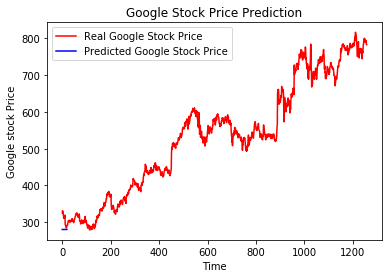

In [19]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google stock Price')
plt.legend()
plt.show()